# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
from plotnine import ggplot,aes,geom_col,facet_wrap,labs,theme_light,geom_text,position_stack,geom_text

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
df_titanic["class"]
passenger_filter = ["1st", "2nd", "3rd"]
passengers = df_titanic["class"].isin(passenger_filter)
passengers_df = df_titanic[passengers]
passengers_df

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [10]:
joint = pd.crosstab(passengers_df["embarked"],passengers_df["class"])
joint


class,1st,2nd,3rd
embarked,,,
B,3,6,0
C,143,26,102
Q,3,7,113
S,175,245,494


In [42]:
joint = pd.crosstab(passengers_df["embarked"],passengers_df["class"],normalize = 'index')
joint

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [45]:
# Calculate the conditional distribution of where they embarked given their class
cd_class_given_embarked = pd.crosstab(passengers_df['class'], passengers_df['embarked'], normalize='columns')
# Print the conditional distribution
print(cd_class_given_embarked)

embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


In [36]:
# Calculate the conditional distribution of where they embarked given their class
cd_embarked_given_class = pd.crosstab(passengers_df['class'], passengers_df['embarked'], normalize='index')
# Print the conditional distribution
print(cd_embarked_given_class)

embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


In [58]:
# What proportion of 3rd class passengers embarked at Southampton? class is given and find the proportion of 3rd class at S, we will use the given_class distribution from above
third_class_Southampton = cd_embarked_given_class.loc['3rd','S']
print(third_class_Southampton)

0.6967559943582511


69.67% of 3rd class passengers embarked at Southampton

In [59]:
# What proportion of Southampton passengers were in 3rd class? embarked S is given and find the pro of s for 3rd class, we will use the given_embarked distribution from above
proportion_Southampton_3rd_class = given_embarked.loc['S', '3rd']
print(proportion_Southampton_3rd_class)

0.5404814004376368


54.08% of the passengers who embarked from Southampton were 3rd class passengers

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

   embarked class  distribution
0         B   1st          0.33
1         C   1st          0.53
2         Q   1st          0.02
3         S   1st          0.19
4         B   2nd          0.67
5         C   2nd          0.10
6         Q   2nd          0.06
7         S   2nd          0.27
8         B   3rd          0.00
9         C   3rd          0.38
10        Q   3rd          0.92
11        S   3rd          0.54


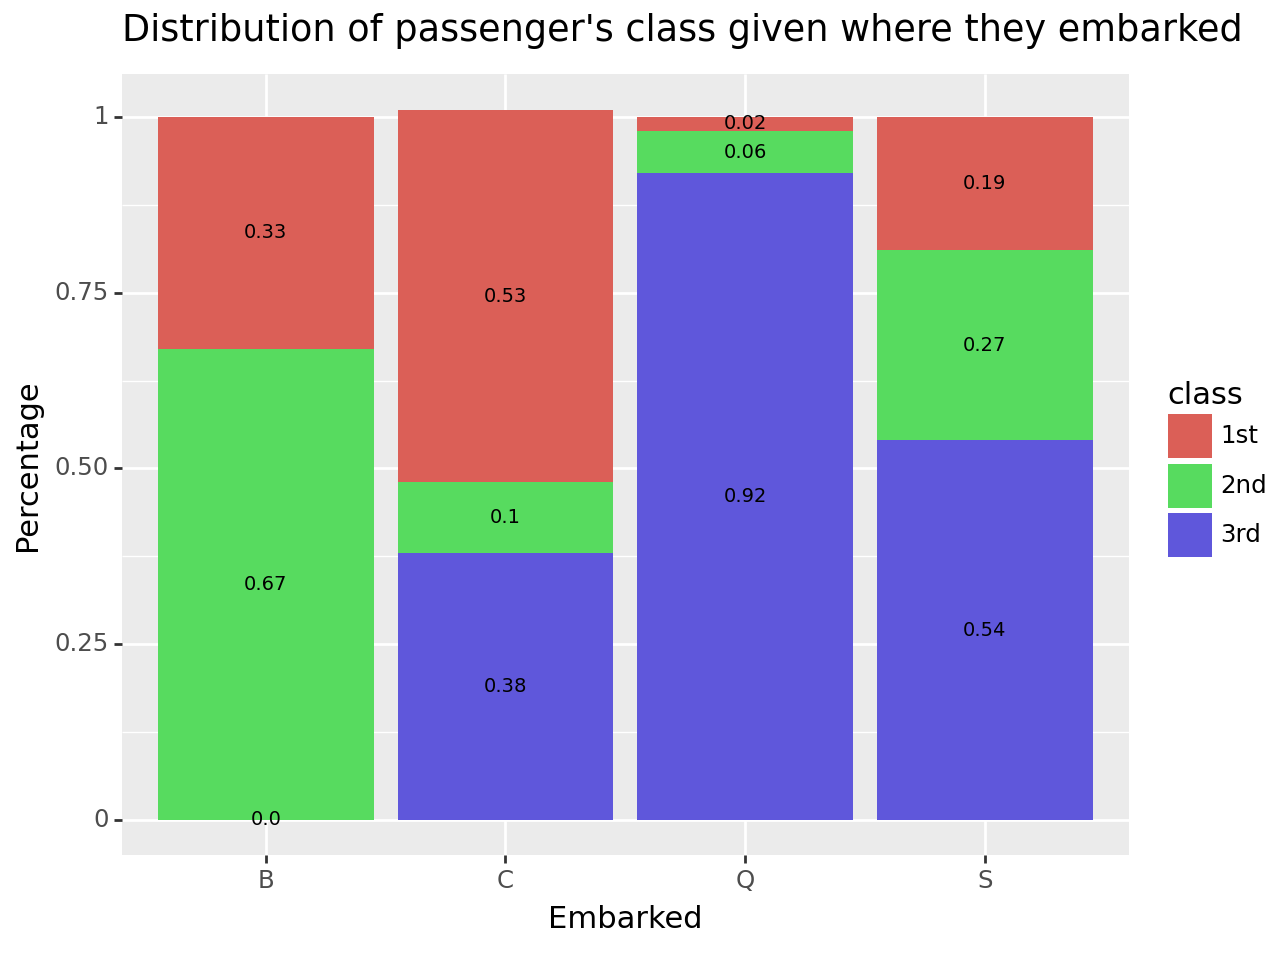

In [60]:
melted_df = pd.melt(joint.reset_index(), id_vars='embarked', var_name='class', value_name='distribution')
melted_df['distribution'] = melted_df.distribution.round(2)
plot = (
    ggplot(melted_df,
           aes(
              x='embarked',
              y='distribution',
              fill='class', label='distribution')) +
    geom_col() +
    labs(y='Percentage', x='Embarked', title="Distribution of passenger's class given where they embarked")+
    geom_text(size="7", position = position_stack(vjust = 0.5))
    )
print(melted_df)
print(plot)

Cons:<br>
Cannot make a plot using the joint distribuiton table.<br>
Might be a abit skewed and can tell a adifferent story.<br>

Pros:<br>
Immediate understanding of the distribution without further calculation for all audience.<br>
Gives an overall distribution based on the percentages of the passengers in Titanic.